In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.patches as mpatches

In [3]:
import matplotlib.gridspec as gridspec

import matplotlib.colors as colors

In [4]:
import numpy as np

In [5]:
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 12

plt.rcParams["font.family"] = "Arial"

In [6]:
import glob

In [7]:
from tqdm.notebook import tqdm

In [8]:
def frequencies(df, max_steps=10**7):
    frequencies = []
    previous = 0
    for value in df["t"][1:]:
        frequencies.append(value - previous)
        previous = value
    frequencies.append(max_steps - previous)

    df["frequencies"] = np.array(frequencies)
    df["frequencies norm"] = np.array(frequencies) / max_steps

    return df

In [9]:
reactone_col = ["p1", "p2", "t", "coop."]

reacttwo_col = ["p1", "p2", "p3", "p4", "t", "coop."]

reactthree_col = ["p1", "p2", "p3", "p4", "p5", "p6", "p7", "p8", "t", "coop."]

### Values

In [10]:
powers = [-5 , -4.5,   -4,   -3.5,   -3,   -2.5, -2,   -1.5,   -1]

### Heat Maps

**Reactive-1**

In [11]:
files = glob.glob("../src/evolution_simulations/ErrorGrid/dimension_2_error_*.csv")

In [12]:
files.sort()

In [13]:
data_r1 = []

for file in tqdm(files):
    error = float(file.split("error_")[-1].split("_cost")[0])
    cost = float(file.split("cost_")[-1].split(".csv")[0])
    df = pd.read_csv(file, names=reactone_col)
    df = df.drop_duplicates()
    df = frequencies(df, 10 ** 7)
    
    coop = sum(df['coop.'] * df['frequencies norm'])
    
    data_r1.append((error, cost, coop))

  0%|          | 0/90 [00:00<?, ?it/s]

In [14]:
df_r1 = pd.DataFrame(data_r1, columns=['error', 'cost', 'coop'])

In [15]:
df_r1 = df_r1.sort_values(["error", "cost"])

**Reactive-2**

In [16]:
files = glob.glob("../src/evolution_simulations/ErrorGrid/dimension_4_error_*.csv")

In [17]:
files.sort()

In [18]:
data_r2 = []

for file in tqdm(files):
    error = float(file.split("error_")[-1].split("_cost")[0])
    cost = float(file.split("cost_")[-1].split(".csv")[0])
    df = pd.read_csv(file, names=reacttwo_col)
    df = df.drop_duplicates()
    df = frequencies(df, 10 ** 7)
    
    coop = sum(df['coop.'] * df['frequencies norm'])
    
    data_r2.append((error, cost, coop))

  0%|          | 0/90 [00:00<?, ?it/s]

In [19]:
df_r2 = pd.DataFrame(data_r2, columns=['error', 'cost', 'coop'])

In [20]:
df_r2 = df_r2.sort_values(["error", "cost"])

**Reactive-3**

In [21]:
files = glob.glob("../src/evolution_simulations/ErrorGrid/dimension_8_error_*.csv")

In [22]:
files.sort()

In [23]:
data_r3 = []

for file in tqdm(files):
    error = float(file.split("error_")[-1].split("_cost")[0])
    cost = float(file.split("cost_")[-1].split(".csv")[0])
    df = pd.read_csv(file, names=reactthree_col)
    df = df.drop_duplicates()
    df = frequencies(df, 10 ** 7)
    
    coop = sum(df['coop.'] * df['frequencies norm'])
    
    data_r3.append((error, cost, coop))

  0%|          | 0/90 [00:00<?, ?it/s]

In [24]:
df_r3 = pd.DataFrame(data_r3, columns=['error', 'cost', 'coop'])

In [25]:
df_r3 = df_r3.sort_values(["error", "cost"])

**Figure**

In [26]:
vmin = 0
vmax = 1
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=0.5, vmax=vmax)

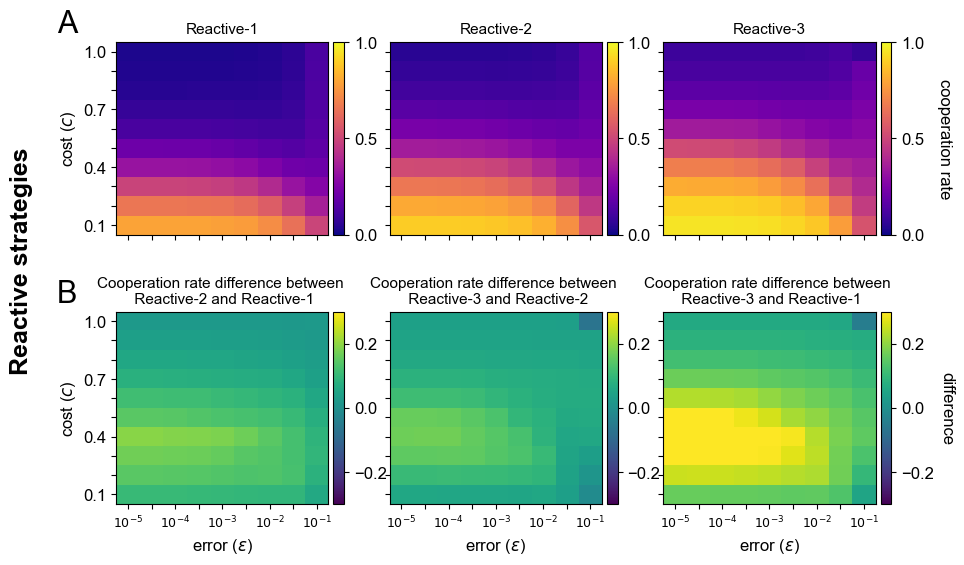

In [38]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(10, 6), sharex=True, sharey=True)

for i, df in enumerate([df_r1, df_r2, df_r3]):

    im = axes[0, i].imshow(df['coop'].values.reshape((9, 10)).T,
                         origin="lower",
                         cmap='plasma',
                         vmax=1,
                         vmin=0, aspect='auto');

    axes[0, i].set_yticks(range(10),
                          [0.1, "", "", 0.4, "", "", 0.7, "", "", 1. ])

    divider = make_axes_locatable(axes[0, i])

    cax = divider.append_axes('right', size='5%', pad=0.05)

    cbar = fig.colorbar(im, cax=cax, orientation='vertical');
    cbar.set_ticks(np.arange(0, 1.1, .5));

cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('cooperation rate', rotation=270)


axes[0, 0].set_ylabel("cost ($c$)")

axes[0, 0].set_title("Reactive-1", fontsize=11)

axes[0, 1].set_title("Reactive-2", fontsize=11)

axes[0, 2].set_title("Reactive-3", fontsize=11);


for i, pair in enumerate([(df_r1, df_r2), (df_r2, df_r3), (df_r1, df_r3)]):

    im = axes[1, i].imshow(pair[1]['coop'].values.reshape((9, 10)).T - pair[0]['coop'].values.reshape((9, 10)).T,
                         origin="lower",
                         cmap='viridis',
                         vmin=-.3,
                        vmax=.3,
                           aspect='auto'
                    );

    axes[1, i].set_xticks(range(9), ['$10^{-5}$',
     '',
     '$10^{-4}$',
     '',
     '$10^{-3}$',
     '',
     '$10^{-2}$',
     '',
     '$10^{-1}$'], fontsize=9, rotation=0)
    
    axes[1, i].set_xlabel("error ($\epsilon$)")

    divider = make_axes_locatable(axes[1, i])

    cax = divider.append_axes('right', size='5%', pad=0.05)

    cbar = fig.colorbar(im, cax=cax, orientation='vertical');
    
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('difference', rotation=270)

axes[0, 0].text(-3, 10, "A", fontsize="22")
axes[1, 0].text(-3, 10, "B", fontsize="22")

axes[1, 0].set_ylabel("cost ($c$)");

axes[1, 0].set_title("Cooperation rate difference between \n Reactive-2 and Reactive-1", fontsize=11);

axes[1, 1].set_title("Cooperation rate difference between \n Reactive-3 and Reactive-2", fontsize=11)

axes[1, 2].set_title("Cooperation rate difference between \n Reactive-3 and Reactive-1", fontsize=11);

axes[0, 0].text(-5, -7.5,
               "Reactive strategies",
               rotation=90, fontsize=18,
               fontweight='bold')
    
fig.subplots_adjust(hspace=.4)

fig.savefig("../figures/siFig2Errors.pdf", bbox_inches="tight")

**Reactive-2 counting**

In [42]:
files = glob.glob("../src/evolution_simulations/ErrorGridcounting/dimension_4_error_*.csv")

In [43]:
files.sort()

In [44]:
len(files)

90

In [45]:
data_r2s = []

for file in tqdm(files):
    error = float(file.split("error_")[-1].split("_cost")[0])
    cost = float(file.split("cost_")[-1].split(".csv")[0])
    df = pd.read_csv(file, names=reacttwo_col)
    df = df.drop_duplicates()
    df = frequencies(df, 10 ** 7)
    
    coop = sum(df['coop.'] * df['frequencies norm'])
    
    data_r2s.append((error, cost, coop))

  0%|          | 0/90 [00:00<?, ?it/s]

In [46]:
df_r2s = pd.DataFrame(data_r2s, columns=['error', 'cost', 'coop'])

In [47]:
df_r2s = df_r2s.sort_values(["error", "cost"])

**Reactive-3 counting**

In [48]:
files = glob.glob("../src/evolution_simulations/ErrorGridcounting/dimension_8_error_*.csv")

In [49]:
files.sort()

In [50]:
len(files)

90

In [51]:
data_r3s = []

for file in tqdm(files):
    error = float(file.split("error_")[-1].split("_cost")[0])
    cost = float(file.split("cost_")[-1].split(".csv")[0])
    df = pd.read_csv(file, names=reacttwo_col)
    df = df.drop_duplicates()
    df = frequencies(df, 10 ** 7)
    
    coop = sum(df['coop.'] * df['frequencies norm'])
    
    data_r3s.append((error, cost, coop))

  0%|          | 0/90 [00:00<?, ?it/s]

In [52]:
df_r3s = pd.DataFrame(data_r3s, columns=['error', 'cost', 'coop'])

In [53]:
df_r3s = df_r3s.sort_values(["error", "cost"])

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(10, 6), sharex=True, sharey=True)

for i, df in enumerate([df_r1, df_r2s, df_r3s]):

    im = axes[0, i].imshow(df['coop'].values.reshape((9, 10)).T,
                         origin="lower",
                         cmap='plasma',
                         vmax=1,
                         vmin=0, aspect='auto');

    axes[0, i].set_yticks(range(10),
                          [0.1, "", "", 0.4, "", "", 0.7, "", "", 1. ])

    divider = make_axes_locatable(axes[0, i])

    cax = divider.append_axes('right', size='5%', pad=0.05)

    cbar = fig.colorbar(im, cax=cax, orientation='vertical');
    cbar.set_ticks(np.arange(0, 1.1, .5));

cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('cooperation rate', rotation=270)


axes[0, 0].set_ylabel("cost ($c$)")

axes[0, 0].set_title("Reactive-1 counting", fontsize=11)

axes[0, 1].set_title("Reactive-2 counting", fontsize=11)

axes[0, 2].set_title("Reactive-3 counting", fontsize=11);


for i, pair in enumerate([(df_r1, df_r2s), (df_r2s, df_r3s), (df_r1, df_r3s)]):

    im = axes[1, i].imshow(pair[1]['coop'].values.reshape((9, 10)).T - pair[0]['coop'].values.reshape((9, 10)).T,
                         origin="lower",
                         cmap='viridis',
                         vmin=-.3,
                        vmax=.3,
                           aspect='auto'
                    );

    axes[1, i].set_xticks(range(9), ['$10^{-5}$',
     '',
     '$10^{-4}$',
     '',
     '$10^{-3}$',
     '',
     '$10^{-2}$',
     '',
     '$10^{-1}$'], fontsize=9, rotation=0)
    
    axes[1, i].set_xlabel("error ($\epsilon$)")

    divider = make_axes_locatable(axes[1, i])

    cax = divider.append_axes('right', size='5%', pad=0.05)

    cbar = fig.colorbar(im, cax=cax, orientation='vertical');
    
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('difference', rotation=270)

axes[0, 0].text(-3, 10, "C", fontsize="22")
axes[1, 0].text(-3, 10, "D", fontsize="22")

axes[1, 0].set_ylabel("cost ($c$)");

axes[1, 0].set_title("Cooperation rate difference between \n counting Reactive-2 and Reactive-1", fontsize=11);

axes[1, 1].set_title("Cooperation rate difference between \n counting Reactive-3 and Reactive-2", fontsize=11)

axes[1, 2].set_title("Cooperation rate difference between \n counting Reactive-3 and Reactive-1", fontsize=11);
    
fig.subplots_adjust(hspace=.4)

fig.savefig("../figures/siFigErrorsCounting.pdf", bbox_inches="tight")